In [209]:
import numpy
import scipy.io.wavfile
from scipy.fftpack import dct
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
from pylab import *
import os
import pandas as pd
import gc
from scipy.signal import blackman
import csv
from scipy.io import wavfile
import wave
from struct import pack
import plotly,plotly as py
#from dtw import dtw
from numpy.linalg import norm
from datetime import datetime
from datetime import timedelta
import ipywidgets as widgets
#from numba import vectorize

gc.enable()

data_path = "data/"
date = "20181205"
stereo_path = "stereo/"
vector_path = "vector/"
visual_path = "visual/"

video_start = '20190826'  #YYYYMMDD
video_end = '20190826'  #YYYYMMDD
temp_video_start = video_start[0:4] + "/" + video_start[4:6] + "/" +video_start[6:8]
temp_video_end = video_end[0:4] + "/" + video_end[4:6] + "/" +video_end[6:8]
print temp_video_start
print temp_video_end

video_startdatte = datetime.strptime(temp_video_start,'%Y/%m/%d')
video_enddate = datetime.strptime(temp_video_end,'%Y/%m/%d')

directory_list = ['cloth','metal','paper','plastic','porcelain','wood']

for mat in directory_list:
    if not os.path.exists(visual_path+mat):
        os.makedirs(visual_path+mat)
        
#material = "porcelain/"

2019/08/26
2019/08/26


In [210]:
session_list = []
with open('data/capture_time.csv') as csvfile: #read session data from capture_time.csv
    readCSV = csv.reader(csvfile, delimiter='-')
    line_no = 0
    print "The data sessions taken during the start and end dates"
    for row in readCSV:
        if row[0] != '' and row[1] != '': #Check if both start and end times of each row exists
            starttime = datetime.strptime(row[0],'%Y/%m/%d %H:%M:%S.%f')
            endtime = datetime.strptime(row[1],'%Y/%m/%d %H:%M:%S.%f')
            #print starttime.date()
            if starttime.date() == video_startdatte.date() and endtime.date() == video_enddate.date(): #Check if sessions available which matches the startdate and enddate
                line_no = line_no + 1
                print "(", line_no, ")", "\t", starttime, "-", endtime
                session_list.append(row[0] + "-" + row[1])

print "Please input the session number. Confirm the start and end times using the video."
session = raw_input("Session ") 
print "You have chosen the session ", session

The data sessions taken during the start and end dates
( 1 ) 	2019-08-26 16:05:36.324000 - 2019-08-26 16:05:43.954000
( 2 ) 	2019-08-26 16:11:03.772000 - 2019-08-26 16:12:31.567000
( 3 ) 	2019-08-26 16:14:30.164000 - 2019-08-26 16:16:04.835000
( 4 ) 	2019-08-26 16:17:09.249000 - 2019-08-26 16:18:51.379000
( 5 ) 	2019-08-26 16:20:17.415000 - 2019-08-26 16:22:01.720000
( 6 ) 	2019-08-26 16:22:48.485000 - 2019-08-26 16:24:32.531000
( 7 ) 	2019-08-26 16:25:14.031000 - 2019-08-26 16:26:58.725000
( 8 ) 	2019-08-26 16:29:13.155000 - 2019-08-26 16:31:01.483000
( 9 ) 	2019-08-26 16:31:45.397000 - 2019-08-26 16:33:36.481000
( 10 ) 	2019-08-26 16:34:13.925000 - 2019-08-26 16:35:58.836000
( 11 ) 	2019-08-26 16:38:41.449000 - 2019-08-26 16:40:49.280000
( 12 ) 	2019-08-26 16:41:49.692000 - 2019-08-26 16:43:29.009000
( 13 ) 	2019-08-26 16:44:09.857000 - 2019-08-26 16:45:46.133000
Please input the session number. Confirm the start and end times using the video.
Session 2,3,4,5,6,7,8,9,10,11,12,13
You 

In [211]:
session_list

['2019/08/26 16:05:36.324-2019/08/26 16:05:43.954',
 '2019/08/26 16:11:03.772-2019/08/26 16:12:31.567',
 '2019/08/26 16:14:30.164-2019/08/26 16:16:04.835',
 '2019/08/26 16:17:09.249-2019/08/26 16:18:51.379',
 '2019/08/26 16:20:17.415-2019/08/26 16:22:01.720',
 '2019/08/26 16:22:48.485-2019/08/26 16:24:32.531',
 '2019/08/26 16:25:14.031-2019/08/26 16:26:58.725',
 '2019/08/26 16:29:13.155-2019/08/26 16:31:01.483',
 '2019/08/26 16:31:45.397-2019/08/26 16:33:36.481',
 '2019/08/26 16:34:13.925-2019/08/26 16:35:58.836',
 '2019/08/26 16:38:41.449-2019/08/26 16:40:49.280',
 '2019/08/26 16:41:49.692-2019/08/26 16:43:29.009',
 '2019/08/26 16:44:09.857-2019/08/26 16:45:46.133']

In [212]:
k=0
for itr in session_list:
    session_starttime = datetime.strptime(itr[0:23],'%Y/%m/%d %H:%M:%S.%f')
    session_endtime = datetime.strptime(itr[24:47],'%Y/%m/%d %H:%M:%S.%f')
    session_list[k] = str(session_starttime) + "-" + str(session_endtime)
    k += 1

In [213]:
#creating labels for each session
dic={}

#for 20190826 dataset (comment out if else)
dic["kit"] = [session_list[1],session_list[2],session_list[3],session_list[4],session_list[5],session_list[6]]
dic["bath"] = [session_list[7],session_list[8],session_list[9],session_list[10],session_list[11],session_list[12]]#[session_list[6],session_list[7],session_list[8]]

#for 20190826 dataset (comment out if else)
#dic["bed"] = [session_list[0],session_list[1],session_list[2]]
#dic["kit"] = [session_list[3],session_list[4],session_list[5]]
#dic["bath"] = [session_list[6],session_list[7],session_list[8]]

In [214]:
features = pd.DataFrame(columns=['label','feature'])
bookmark=0
for label in dic:
    for sess in dic[label]:
        my_data = genfromtxt("vector/"+sess+'.csv', delimiter=',')
        features.loc[bookmark]=label,my_data
        bookmark+=1

In [215]:
###Creating data set to visualize
vis_feat = []
vis_lab = []
bookmark=0
for label in dic:
    for sess in dic[label]:
        my_data2 = genfromtxt("vector/"+sess+'.csv', delimiter=',')
        for i in range(0,3):
            if i==0:
                feat_label = label+"_mfcc"#+my_data2[:,i]
                vis_lab.append(feat_label)
                vis_feat.append(my_data2[:,i])
            if i==1:
                feat_label = label+"_dmfcc"#+my_data2[:,i]
                vis_lab.append(feat_label)
                vis_feat.append(my_data2[:,i])
            if i==2:
                feat_label = label+"_ddmfcc"#+my_data2[:,i]
                vis_lab.append(feat_label)
                vis_feat.append(my_data2[:,i])

In [216]:
my_data2[:,0]

array([  1.7022876 ,   0.88065903,   0.64957108,   1.69260806,
         2.54704334,   3.25767138,   4.17576475,   5.60538064,
         7.0535072 ,   5.36730821,   4.44032168,   3.72396163,
         3.17441689,   2.60196335,   2.09584559,   1.9821877 ,
         2.12714237,   2.15273877,   2.19758333,   2.13424234,
         1.83200496,   1.20998899, -12.87433974,   3.03095196,
        -2.77134036,  -6.39371143,   6.79207294,   2.38680174,
         3.15879099,   4.41311873,   6.36717757,   0.51409488,
        -2.42932551,   1.75132584,  -5.73887182,  -1.47904129,
         0.99766486,  -2.67594345, -13.32099722,  -8.99090307,
         1.8304255 ,  -3.72177543, -35.54354438,  -3.43054105,
         5.52371039])

In [217]:
pd.DataFrame(vis_feat)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.808834,1.334728,1.351963,1.534002,1.673033,1.847060,1.932279,1.771475,1.114234,-0.451729,...,5.409887,4.918810,1.500316,0.096235,1.254416,-4.495304,1.731276,0.795926,1.249891,-0.673320
1,-0.556429,-0.653564,-0.994917,-1.202889,-1.157616,-0.907771,-0.497595,-0.037756,0.331802,0.362910,...,1.286020,-1.280524,0.159820,-1.071781,-0.489970,0.396726,-0.394960,0.304379,0.711525,1.156960
2,1.228642,1.088539,1.238236,1.375385,1.340005,1.175537,0.918027,0.604013,0.177789,-0.451709,...,-0.426253,0.342473,-1.093618,3.682112,-0.025361,0.488056,-0.366042,-0.675090,-0.873357,-1.121628
3,-0.071847,0.926596,0.654981,0.795534,1.141716,1.736270,2.513388,3.055149,2.578293,1.700457,...,1.433107,9.547704,-2.476560,0.336760,-3.260457,-6.149177,-2.552944,3.948296,-2.604172,0.284034
4,-1.167668,-1.902906,-2.075014,-1.844812,-1.282531,-0.384183,0.869261,2.111595,1.555093,0.996751,...,0.381350,-2.723347,0.535909,0.891564,-0.051183,1.055580,1.182761,-0.043902,1.762982,0.122180
5,1.095014,1.331223,1.747324,1.976311,2.095850,2.437881,3.261663,4.063223,2.761008,1.505448,...,-2.496550,1.720853,1.839049,2.928706,-0.205442,-0.945420,-1.501842,2.934604,-0.765362,-0.619808
6,0.875128,1.939355,1.280692,1.059770,1.102540,1.270344,1.250350,1.041164,1.359470,1.039206,...,-0.686891,4.934914,-2.358930,-2.477366,-0.001765,-1.869901,-0.656272,3.974566,-0.897456,1.969621
7,0.735847,-0.407062,-1.194933,-1.417584,-1.268360,-0.907948,-0.295588,0.339580,1.455128,0.853626,...,0.007992,-1.244966,0.548553,-4.342947,-0.290710,-0.126064,0.151604,-0.299851,-0.684233,0.822793
8,0.381119,0.523006,0.837586,1.169501,1.398013,1.531128,1.569848,1.680867,2.697103,1.005045,...,-0.673058,-0.374926,-0.619389,1.978243,-0.306514,0.355424,-0.756588,-0.312127,0.901643,-0.801777
9,0.224277,-0.869206,0.099221,0.570344,0.869576,1.077927,1.329209,1.375639,0.981285,-0.574089,...,-11.258855,-8.712666,-2.812334,5.870801,-0.980365,3.632053,5.318641,0.415128,-1.438622,3.166231


In [218]:
pd.DataFrame(vis_lab)

,0
0,bath_mfcc
1,bath_dmfcc
2,bath_ddmfcc
3,bath_mfcc
4,bath_dmfcc
5,bath_ddmfcc
6,bath_mfcc
7,bath_dmfcc
8,bath_ddmfcc
9,bath_mfcc


In [219]:
visual_features = pd.concat([pd.DataFrame(vis_lab),pd.DataFrame(vis_feat)], axis=1)

In [220]:
visual_features.to_csv("vis_features.csv", header=False, index=False)

In [221]:
features

,label,feature
0,bath,"[[1.8088338579272556, -0.5564292785562678, 1.2..."
1,bath,"[[-0.07184710263731701, -1.167667687335781, 1...."
2,bath,"[[0.8751278510009687, 0.73584650224011, 0.3811..."
3,bath,"[[0.22427748723747212, 0.2439993314619305, 0.7..."
4,bath,"[[1.2068370146873102, -0.017845258733333935, 0..."
5,bath,"[[1.3784255589289895, 0.05910975919899539, 0.6..."
6,kit,"[[0.9115847655377225, -0.5712448972644488, 0.4..."
7,kit,"[[0.5705721770548315, -0.7054431082461373, 0.4..."
8,kit,"[[0.45530447184940126, -0.6194147517520707, 0...."
9,kit,"[[1.0863302022360612, -0.2565934896666876, 0.3..."


In [222]:
len(features['feature'][0])

45

In [223]:
features['feature'][3].T

array([[ 2.24277487e-01, -8.69206272e-01,  9.92211832e-02,
         5.70344363e-01,  8.69576048e-01,  1.07792728e+00,
         1.32920909e+00,  1.37563880e+00,  9.81285257e-01,
        -5.74088752e-01, -2.19891592e+00, -3.88317861e-02,
         9.53860591e-01,  1.27674920e+00,  1.47028815e+00,
         1.48131793e+00,  1.42229574e+00,  1.17406217e+00,
         1.12502732e+00,  7.99004759e-01,  3.76097966e-01,
        -4.69336356e-01, -1.48366063e+01, -1.11414307e-01,
         6.72676717e-01,  9.74365590e+00, -1.46264952e+00,
        -2.18081611e+00,  1.10121027e+00, -2.42877633e-01,
         6.68815463e+00, -2.18908292e+00,  5.73148971e+00,
        -6.41510454e-01, -7.92804621e+00, -1.12588551e+01,
        -8.71266585e+00, -2.81233406e+00,  5.87080101e+00,
        -9.80365463e-01,  3.63205266e+00,  5.31864145e+00,
         4.15128235e-01, -1.43862190e+00,  3.16623061e+00],
       [ 2.43999331e-01,  4.01555117e-01, -1.16689152e-01,
        -5.39267668e-01, -7.81253288e-01, -7.97840436e-

In [224]:
min_len = len(features['feature'].values[0])
for n in range(0,len(features)):
    print len(features['feature'].values[n]) 
    if len(features['feature'].values[n]) < min_len:
        min_len = len(features['feature'].values[n])
        
print min_len

45
45
45
45
45
45
45
45
45
45
45
45
45


In [225]:
for m in range(0,len(features)):
    if len(features['feature'].values[m]) > min_len: #adjust this to fit the necessary length of features
        features['feature'].values[m] = np.delete(features['feature'].values[m],(0),axis=0)

In [226]:
for m1 in range(0,len(features)):
    print len(features['feature'].values[m1])

45
45
45
45
45
45
45
45
45
45
45
45


In [227]:
features['feature'][3].T

array([[ 2.24277487e-01, -8.69206272e-01,  9.92211832e-02,
         5.70344363e-01,  8.69576048e-01,  1.07792728e+00,
         1.32920909e+00,  1.37563880e+00,  9.81285257e-01,
        -5.74088752e-01, -2.19891592e+00, -3.88317861e-02,
         9.53860591e-01,  1.27674920e+00,  1.47028815e+00,
         1.48131793e+00,  1.42229574e+00,  1.17406217e+00,
         1.12502732e+00,  7.99004759e-01,  3.76097966e-01,
        -4.69336356e-01, -1.48366063e+01, -1.11414307e-01,
         6.72676717e-01,  9.74365590e+00, -1.46264952e+00,
        -2.18081611e+00,  1.10121027e+00, -2.42877633e-01,
         6.68815463e+00, -2.18908292e+00,  5.73148971e+00,
        -6.41510454e-01, -7.92804621e+00, -1.12588551e+01,
        -8.71266585e+00, -2.81233406e+00,  5.87080101e+00,
        -9.80365463e-01,  3.63205266e+00,  5.31864145e+00,
         4.15128235e-01, -1.43862190e+00,  3.16623061e+00],
       [ 2.43999331e-01,  4.01555117e-01, -1.16689152e-01,
        -5.39267668e-01, -7.81253288e-01, -7.97840436e-

In [228]:
features

,label,feature
0,bath,"[[1.8088338579272556, -0.5564292785562678, 1.2..."
1,bath,"[[-0.07184710263731701, -1.167667687335781, 1...."
2,bath,"[[0.8751278510009687, 0.73584650224011, 0.3811..."
3,bath,"[[0.22427748723747212, 0.2439993314619305, 0.7..."
4,bath,"[[1.2068370146873102, -0.017845258733333935, 0..."
5,bath,"[[1.3784255589289895, 0.05910975919899539, 0.6..."
6,kit,"[[0.9115847655377225, -0.5712448972644488, 0.4..."
7,kit,"[[0.5705721770548315, -0.7054431082461373, 0.4..."
8,kit,"[[0.45530447184940126, -0.6194147517520707, 0...."
9,kit,"[[1.0863302022360612, -0.2565934896666876, 0.3..."


In [229]:
features.to_csv("features.csv",index=False,header=False)

# Distance matrix calculation

In [230]:
def cos_dist_mat_calc(feat,feat_type):
    n=0
    feat_array = []
    
    if feat_type == 'mfcc':
        n = 0
    if feat_type == 'dmfcc':
        n = 1
    if feat_type == 'ddmfcc':
        n = 2
        
    for m in range(0,len(feat)):
        #print feat['feature'][m].T[n]
        feat_array.append(feat['feature'][m].T[n])
    print len(feat_array)
    
    #Calculating cosine similarity and inversing the matrix
    similarity = np.dot(feat_array, np.array(feat_array).T)
    square_mag = np.diag(similarity)
    inv_square_mag = 1 / square_mag
    inv_square_mag[np.isinf(inv_square_mag)] = 0
    inv_mag = np.sqrt(inv_square_mag)
    
    cosine = similarity * inv_mag
    cosine = cosine.T * inv_mag    
    
    cosine = 1.0 - cosine/cosine.max() #calculating the distance and normalizing
    
    plt.figure(figsize=(10,10))
    plt.imshow(cosine, cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(feat_array),0,len(feat_array)], aspect='auto')
    return cosine

In [231]:
from scipy.spatial import distance

def euc_dist_mat_calc(feat,feat_type):
    n=0
    feat_array = []
    mt2 = []
    
    if feat_type == 'mfcc':
        n = 0
    if feat_type == 'dmfcc':
        n = 1
    if feat_type == 'ddmfcc':
        n = 2
        
    for m in range(0,len(feat)):
        #print feat['feature'][m].T[n]
        feat_array.append(feat['feature'][m].T[n])
    #print feat_array
    
    for f1 in feat_array:
        mt1 = []
        for f2 in feat_array:
            mt1.append(distance.euclidean(f1,f2))
        mt2.append(mt1)
    
    mt2 = mt2/np.array(mt2).max() #normalizing
    
    plt.figure(figsize=(10,10))
    plt.imshow(mt2, cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(feat_array),0,len(feat_array)], aspect='auto')
    return mt2

In [232]:
from cdtw import pydtw

def dtw_dist_mat_calc(feat,feat_type):
    n=0
    feat_array = []
    mt2 = []
    
    if feat_type == 'mfcc':
        n = 0
    if feat_type == 'dmfcc':
        n = 1
    if feat_type == 'ddmfcc':
        n = 2
        
    for m in range(0,len(feat)):
        #print feat['feature'][m].T[n]
        feat_array.append(feat['feature'][m].T[n])
    #print feat_array
    
    for f1 in feat_array:
        mt1 = []
        for f2 in feat_array:
            mt1.append(pydtw.dtw(f1,f2).get_dist())
        mt2.append(mt1)
    
    mt2 = mt2/np.array(mt2).max()
    
    plt.figure(figsize=(10,10))
    plt.imshow(mt2, cmap='jet', interpolation='nearest', origin='upper', extent=[0,len(feat_array),0,len(feat_array)], aspect='auto')
    return mt2

12


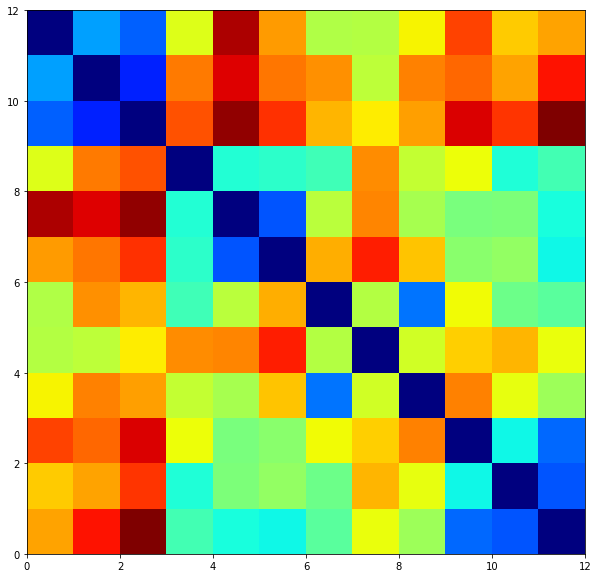

In [233]:
mfcc_dist = cos_dist_mat_calc(features,"ddmfcc")

In [234]:
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(mfcc_dist, method='ward', metric='euclidean')

/home/thilina/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



{'color_list': ['g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b'],
 'dcoord': [[0.0, 0.4810207822169602, 0.4810207822169602, 0.0],
  [0.0, 0.8385597048165346, 0.8385597048165346, 0.4810207822169602],
  [0.0, 0.6262612093656537, 0.6262612093656537, 0.0],
  [0.0, 1.6283789556375516, 1.6283789556375516, 0.6262612093656537],
  [0.0, 0.6473648761547756, 0.6473648761547756, 0.0],
  [0.0, 0.917179487659662, 0.917179487659662, 0.6473648761547756],
  [0.0, 0.6699413696819098, 0.6699413696819098, 0.0],
  [0.0, 1.143998447100741, 1.143998447100741, 0.6699413696819098],
  [0.917179487659662,
   1.6831787582131423,
   1.6831787582131423,
   1.143998447100741],
  [1.6283789556375516, 2.81774937455757, 2.81774937455757, 1.6831787582131423],
  [0.8385597048165346,
   4.517606840375839,
   4.517606840375839,
   2.81774937455757]],
 'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 

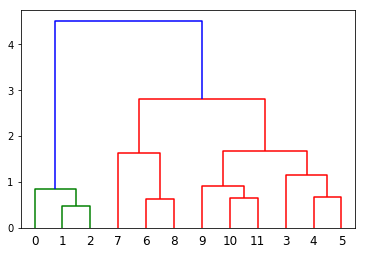

In [235]:
dendrogram(Z)

In [236]:
t = 0.9#0.7*max(Z[:,2])
clusters = fcluster(Z, 2.5, criterion='distance')#100

In [237]:
clusters

array([1, 1, 1, 3, 3, 3, 2, 2, 2, 3, 3, 3], dtype=int32)

# Remove below this

ft = []
for m2 in range(0,len(features)):
    ft.append(features['feature'].values[m2].reshape(-1))

ft

len(ft[0])

norm = [0] * len(ft[0])

dist = []
for t in range(0,9):
    dist.append(numpy.linalg.norm(norm-ft[t]))

dist


for m3 in range(0,len(features)):
    print features['feature'].values[m3][0]

features['feature'].values[0]

for itr2 in range(0,len(features['feature'].values[0])):
    print features['feature'].values[0][itr2][0]

#Separating features related to mfcc, dmfcc, ddmfcc
ft_mfcc_tmp = []
ft_dmfcc_tmp = []
ft_ddmfcc_tmp = []
ft_mfcc = []
ft_dmfcc = []
ft_ddmfcc = []
for itr1 in range(0,len(features['feature'])):
    for itr2 in range(0,len(features['feature'].values[itr1])):
        ft_mfcc_tmp.append(features['feature'].values[itr1][itr2][0])
        ft_dmfcc_tmp.append(features['feature'].values[itr1][itr2][1])
        ft_ddmfcc_tmp.append(features['feature'].values[itr1][itr2][2])
    ft_mfcc.append(ft_mfcc_tmp)  
    ft_dmfcc.append(ft_dmfcc_tmp)
    ft_ddmfcc.append(ft_ddmfcc_tmp)  

len(ft_mfcc)

print features['feature'].values[1]

# Clustering

from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

def gmm_cluster(ft, n_comp, max_iter ,rand_stat):
    gmm = GaussianMixture(n_components=n_comp, covariance_type ='full', \
                  init_params = 'random', max_iter = max_iter, random_state=rand_stat)#random_state=1024
    gmm.fit(ft)
    #print(gmm.means_.round(2))
    cluster = gmm.predict(ft)
    print cluster
    return cluster

def plot_cluster(cluster,title,pic):
    plt.figure(figsize = (30,5))
    plt.title(title)
    plt.xlim(0,len(cluster)-1)
    plt.plot(cluster)
    plt.savefig(visual_path + pic +".png")
    plt.show()

## GMM clustering

cluster = gmm_cluster(ft,3,100,1024)
plot_cluster(cluster,"GMM clustering for appended features","app_features")

cluster_mfcc = gmm_cluster(ft_mfcc,3,100,1024)
plot_cluster(cluster_mfcc,"GMM clusterin for mfcc","mfcc")

cluster_dmfcc = gmm_cluster(ft_dmfcc,3,100,1024)
plot_cluster(cluster_dmfcc,"GMM clusterin for dmfcc","dmfcc")

cluster_ddmfcc = gmm_cluster(ft_ddmfcc,3,100,1024)
plot_cluster(cluster_ddmfcc,"GMM clusterin for ddmfcc","ddmfcc")

## Hierarchical clustering

from sklearn.cluster import AgglomerativeClustering

hy_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hy_pred = hy_cluster.fit_predict(ft)
print hy_pred

plot_cluster(hy_pred, "Hierarchical clustering for hierarchical clustering of appended features","app_hierarchical")

x = np.delete(features['feature'].values[0],(0),axis=0)
#x = numpy.delete(x, (0), axis=0)

features['feature'].values[0].reshape(-1)

# Above from here

len(x)

features['feature'].values[0][0]

numpy.concatenate( features['feature'].values, axis=0 )

for index, row in features.iterrows():
    print index
    features[0,'features2']=row[1].reshape(-1)

features = pd.DataFrame()
bookmark=0
ft = []
for label in dic:
    for sess in dic[label]:
        features2 = pd.read_csv("vector/"+sess+'.csv',header=None)
        ft.append(features2.values.reshape(-1).T)
        #print pd.DataFrame(data=features2.values.T.reshape(-1)).transpose()
        #features.append(pd.DataFrame(features2.values.reshape(-1).transpose()),ignore_index=True)
        #features.append(pd.DataFrame(data=features2.values.T.reshape(-1)).transpose())
        #my_data = genfromtxt("vector/"+sess+'.csv', delimiter=',')
        #features2.loc[bookmark]=label,my_data
        #bookmark+=1

features2

for vec in ft:
    print len(vec)

for t in range(0,9):
    if t!=7:
        print numpy.linalg.norm(ft[4]-ft[t])

#features.set_value()
pd.DataFrame(columns=[ft[0],ft[1],ft[1],ft[2],ft[3],ft[4],ft[5],ft[6],ft[7],ft[8]])

pd.DataFrame(ft).fillna(value=0, inplace=True)
ft2=np.asarray(ft)

np.savetxt("file_name.csv", ft2, delimiter=",", fmt='%s', header=None)

type(ft)

test = pd.DataFrame()

test = (pd.DataFrame(ft[0]))

test.append(pd.DataFrame(ft[3]))

pd.DataFrame(np.concatenate(ft))

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(np.asarray(ft).reshape(-1, 1))  

from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type ='full', \
              init_params = 'random', max_iter = 100, random_state=3)
gmm.fit(ft)
print(gmm.means_.round(2))
cluster = gmm.predict(ft)